# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

### ノック１：データを読み込んでみよう

In [1]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [2]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')

In [4]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### ノック２：データを結合(ユニオン)してみよう

In [5]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [7]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [8]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [9]:
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### ノック３：売上データ同士を結合(ジョイン)してみよう

In [10]:
join_data = pd.merge(transaction_detail,transaction, on = 'transaction_id', how = 'left')

In [11]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865


In [12]:
print(len(join_data))

7144


In [13]:
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


### ノック４：マスタデータを結合(ジョイン)してみよう

In [14]:
join_data = pd.merge(join_data,customer_master,on = 'customer_id', how = 'left')

In [15]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [16]:
join_data = pd.merge(join_data,item_master ,on = 'item_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,price,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,210000,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,50000,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,120000,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,210000,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,170000,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


### ノック5：必要なデータ列を作ろう

In [17]:
join_data['price'] = join_data['item_price'] * join_data['quantity'] 

### ノック6：データ検算をしよう

In [18]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
price                 0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
dtype: int64

In [21]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
price                  int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
dtype: object

### ノック7：各種統計量を把握しよう

In [22]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])

In [25]:
join_data['payment_month'] = join_data['payment_date'].dt.strftime("%Y%m")

In [26]:
join_data.groupby('payment_month').sum()

,detail_id,quantity,price,age,item_price
payment_month,,,,,
201902,676866,1403,160185000,59279,142805000
201903,2071474,1427,160370000,58996,142980000
201904,3476816,1421,160510000,59246,143670000
201905,4812795,1390,155420000,58195,139655000
201906,6369999,1446,164030000,61070,147090000
201907,8106846,1485,170620000,62312,153215000


### ノック8：月別でデータを集計してみよう

In [28]:
join_data.groupby(['payment_month','item_name']).sum()

detail_id  quantity     price    age  item_price
payment_month item_name                                                  
201902        PC-A          192357       483  24150000  17274    16700000
              PC-B          138010       297  25245000  11928    20145000
              PC-C           81497       165  19800000   7727    18240000
              PC-D           91435       173  31140000   8377    29340000
              PC-E          173567       285  59850000  13973    58380000
201903        PC-A          635721       520  26000000  18300    18200000
              PC-B          413971       300  25500000  12084    20230000
              PC-C          245842       159  19080000   7178    17160000
              PC-D          247832       143  25740000   6719    25020000
              PC-E          528108       305  64050000  14715    62370000
201904        PC-A         1076125       518  25900000  18198    18450000
              PC-B          638789       276  23460000  10926    18360000
              PC-C          496212       183  21960000   8203    20160000
              PC-D          368204       135  24300000   6340    22860000
              PC-E          897486       309  64890000  15579    63840000
201905        PC-A         1487314       497  24850000  18040    18100000
              PC-B          990251       298  25330000  12080    20485000
              PC-C          631230       171  20520000   7466    18480000
              PC-D          567773       144  25920000   6913    24840000
              PC-E         1136227       280  58800000  13696    57750000
201906        PC-A         1874692       520  26000000  18426    17750000
              PC-B         1229074       282  23970000  11613    19720000
              PC-C          891651       182  21840000   8644    20040000
              PC-D          792209       160  28800000   7195    27000000
              PC-E         1582373       302  63420000  15192    62580000
201907        PC-A         2339702       505  25250000  17941    17950000
              PC-B         1727205       332  28220000  13591    22525000
              PC-C          946483       162  19440000   7060    17400000
              PC-D          912353       145  26100000   6851    25200000
              PC-E         2181103       341  71610000  16869    70140000

In [33]:
pd.pivot_table(join_data,index = 'item_name', columns = 'payment_month', values = ['price','quantity'], aggfunc= 'sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [54]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


### ノック9：月別、商品別でデータを集計してみよう

In [55]:
list(graph_data.index)

['201902', '201903', '201904', '201905', '201906', '201907']

In [56]:
graph_data.columns

Index(['PC-A', 'PC-B', 'PC-C', 'PC-D', 'PC-E'], dtype='object', name='item_name')

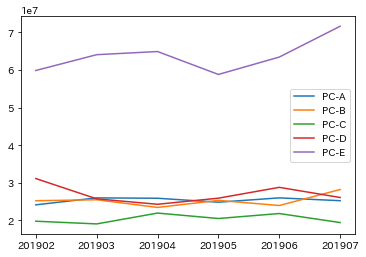

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()

### ノック10：商品別の売上推移を可視化してみよう

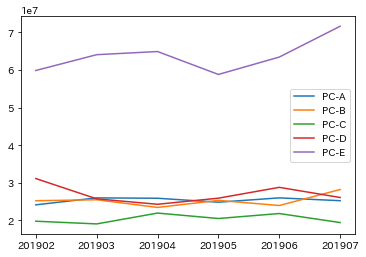

In [84]:
for i in range(len(graph_data.columns)):
    plt.plot(list(graph_data.index), graph_data[graph_data.columns[i]])
plt.legend()